# Example 1: 1D Harmonic Oscillator

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib notebook

ModuleNotFoundError: No module named 'sklearn'

<IPython.core.display.Javascript object>


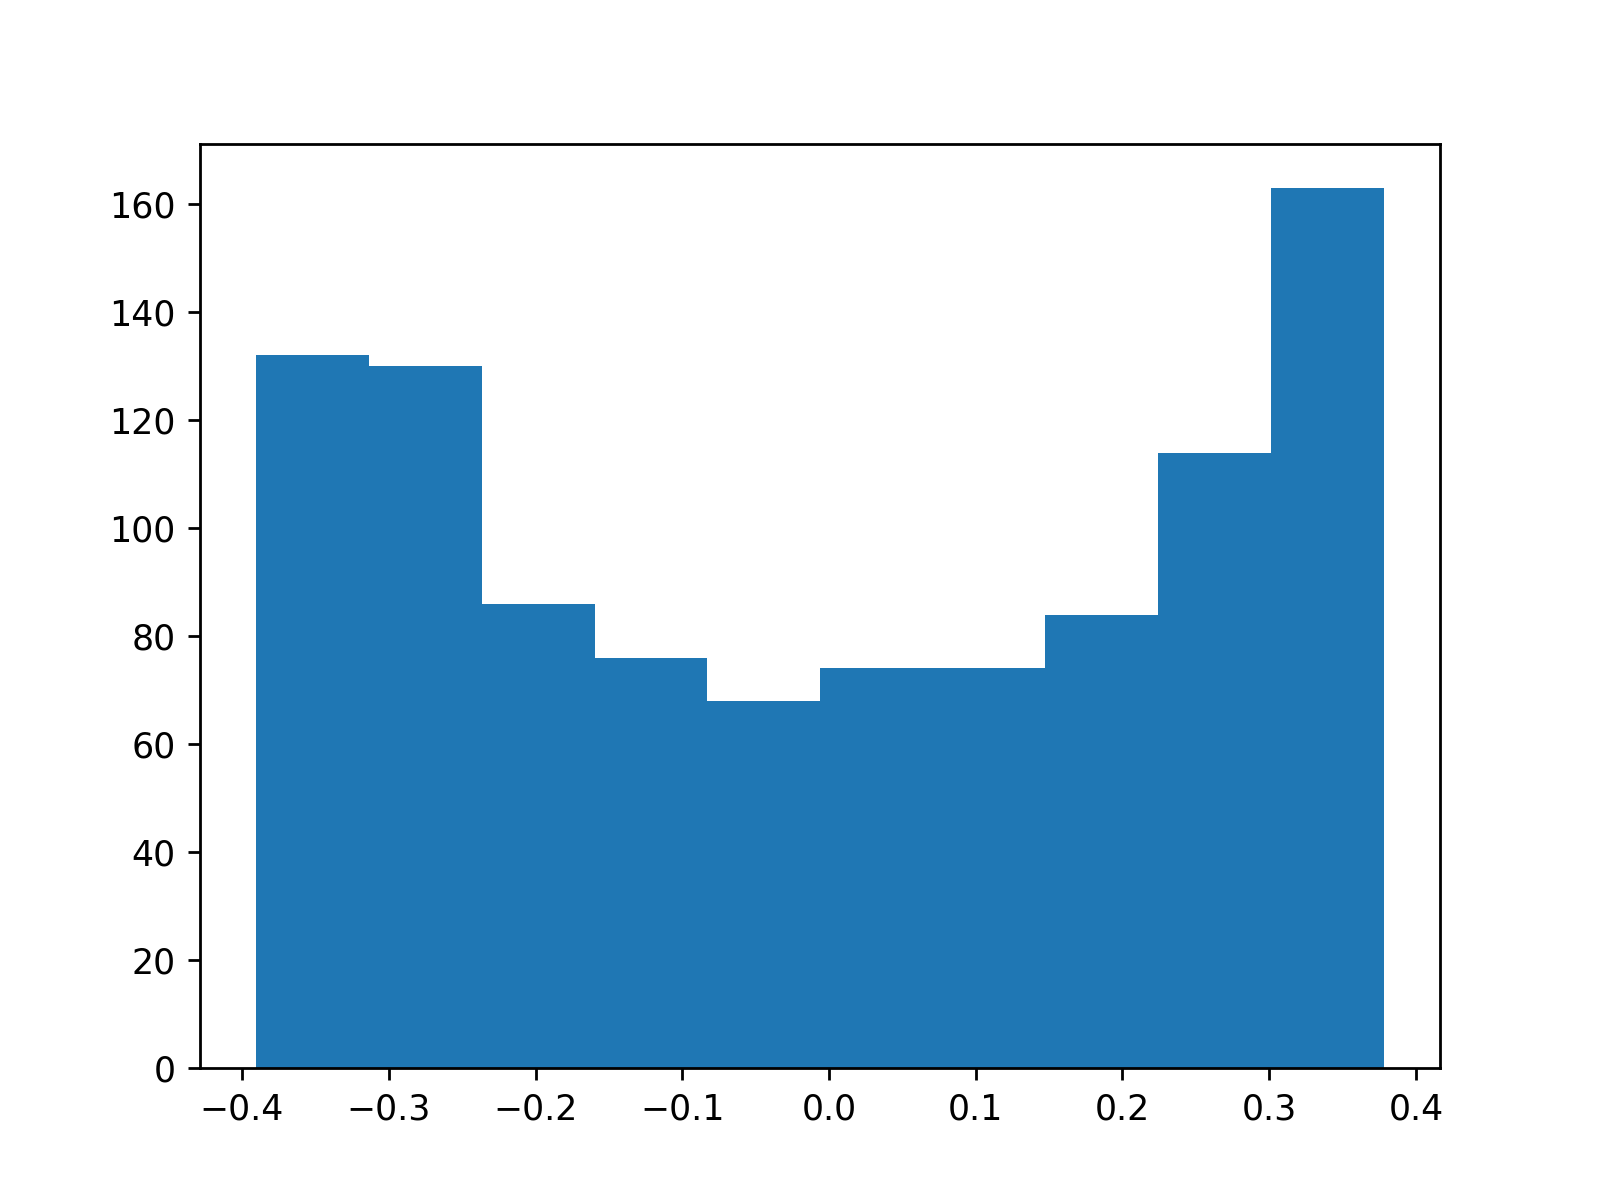

<IPython.core.display.Javascript object>


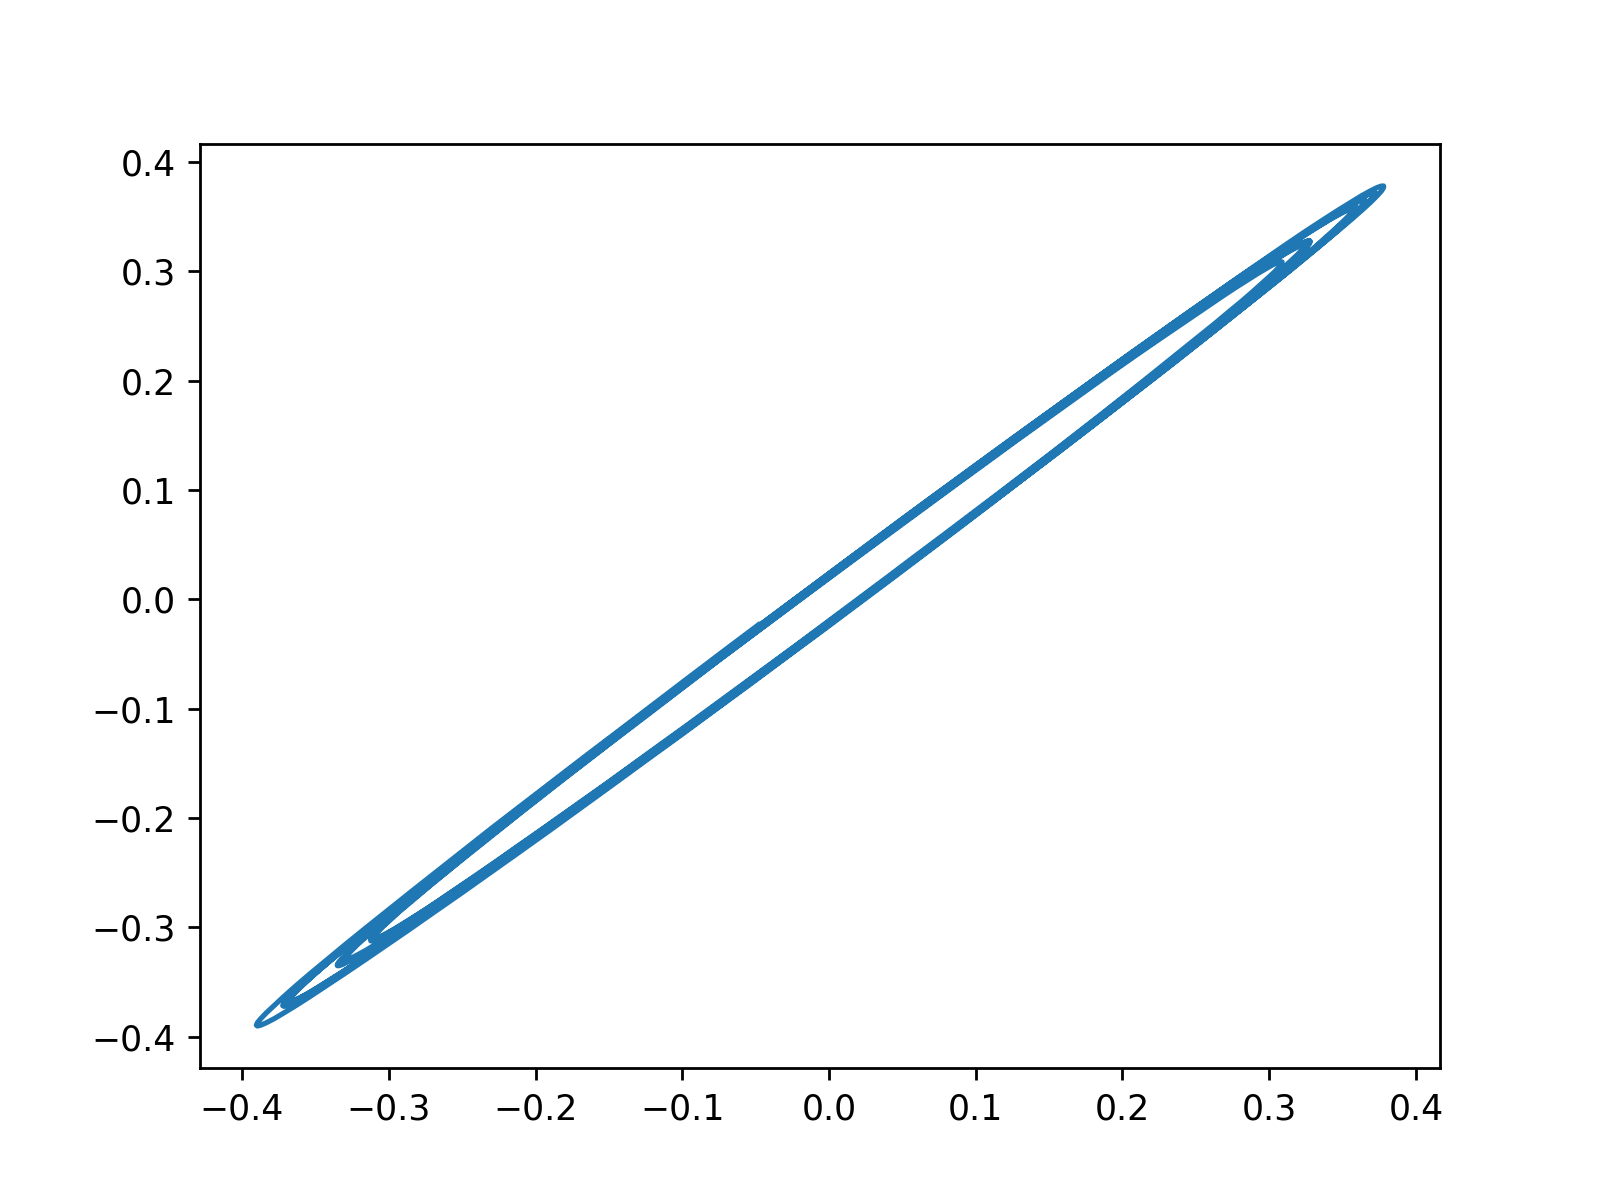

<IPython.core.display.Javascript object>


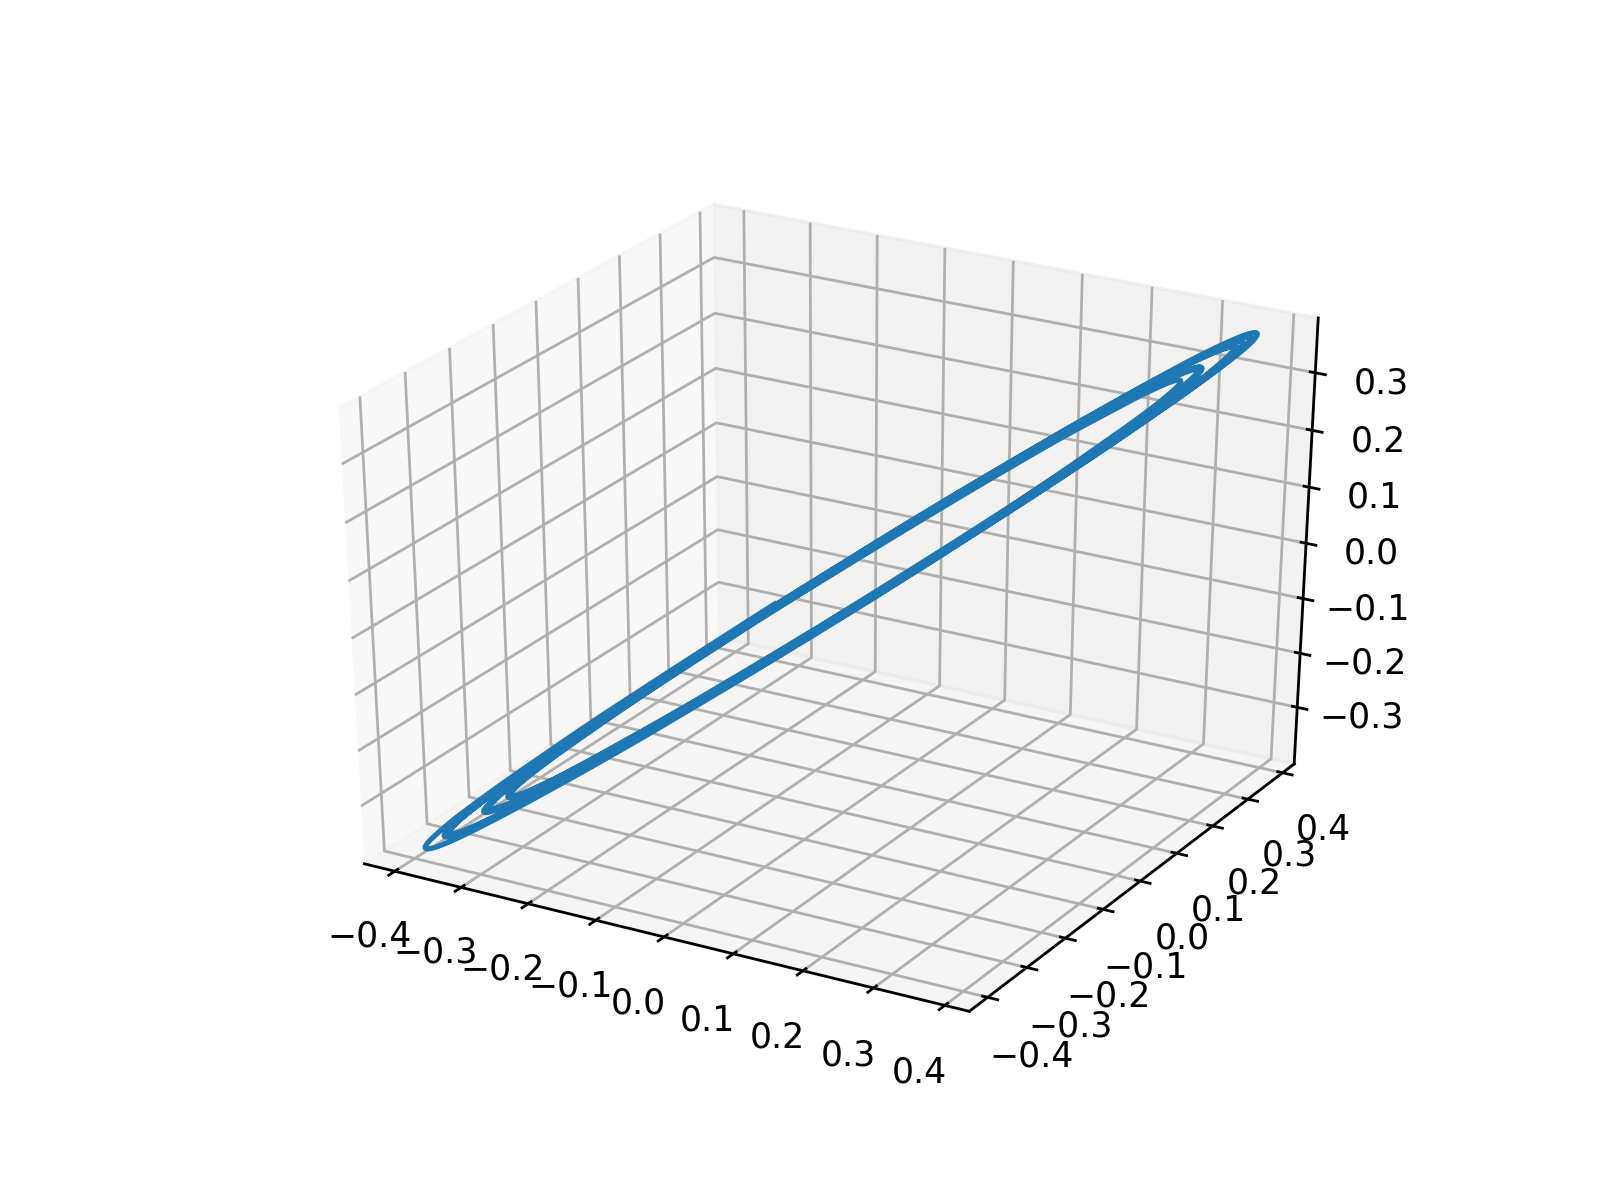

In [38]:
x = 0
vx = 1
k = 10
noiseMag = 0.5
tau = 2 * np.pi / np.sqrt(k)
T = 10 * tau
dt = tau / 100
Nstep = int (T / dt)


xLst = np.zeros(Nstep+1)
xLst[0] = x
for i in range(1,Nstep+1):
    vx -= k * x * dt + #np.random.uniform(-noiseMag, +noiseMag) * dt
    x += vx * dt
    xLst[i] = x

    
fig = plt.figure()
plt.hist(xLst)
plt.show()

fig = plt.figure()
plt.plot(xLst[:-1], xLst[1:])
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xLst[:-2], xLst[1:-1], xLst[2:])
fig.show()

In [39]:
# Apply PCA
data3D = np.array(list(zip(xLst[:-2], xLst[1:-1], xLst[2:])))
pca = PCA(n_components=3, svd_solver='full')
pca.fit(data3D)
print(pca.components_)
print(pca.singular_values_)
print(pca.explained_variance_ratio_)

[[ -5.76965480e-01  -5.78108716e-01  -5.76975864e-01]
 [ -7.07056237e-01  -1.13575967e-04   7.07157312e-01]
 [ -4.08879336e-01   8.15959742e-01  -4.08689844e-01]]
[  1.36137109e+01   6.96495054e-01   1.48642965e-03]
[  9.97389344e-01   2.61064458e-03   1.18905077e-08]


Note that the princpial values come out to be position $\bar{x} = \frac{x_+ + x_0 + x_-}{3}$, velocity $v = \frac{x_+ - x_-}{2dt}$ and acceleration $a = \frac{x_+ - 2x_0 + x_-}{dt^2}$. The acceleration component is significantly lower than the other two, and does not deliver additional information in the case of a perfect oscillator, as it co-varies with position. In the case of a noisy oscillator, it does not entirely co-vary with position due to noise, so it does explain some variance. 

# Example 2: 2D Harmonic Oscillator

<IPython.core.display.Javascript object>


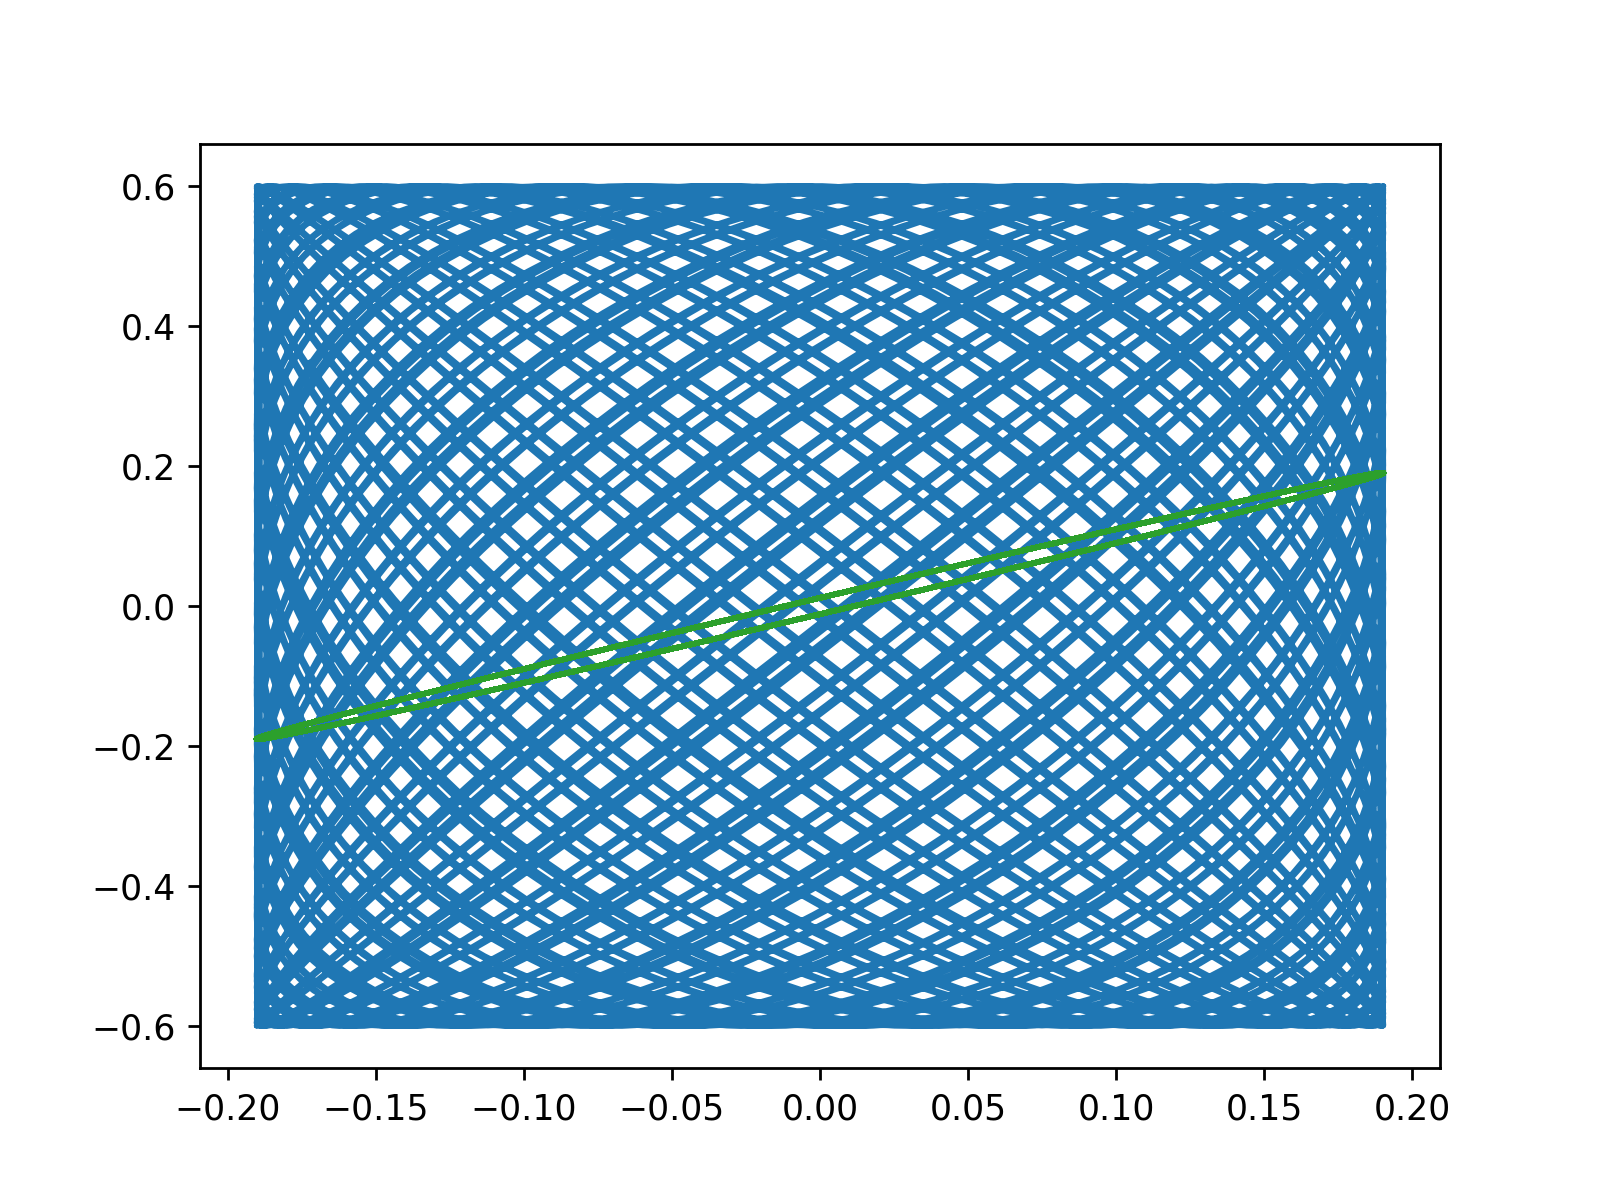

In [51]:
x2D = np.random.uniform(-1, 1, 2)
v2D = np.random.uniform(-1, 1, 2)
k = np.array([10, 11])

tau = 2 * np.pi / np.sqrt(np.average(k))
T = 100 * tau
dt = tau / 100
Nstep = int (T / dt)


x2DLst = np.zeros(Nstep+1)
y2DLst = np.zeros(Nstep+1)
x2DLst[0] = x2D[0]
y2DLst[0] = x2D[1]
for i in range(1,Nstep+1):
    v2D -= k * x2D * dt
    x2D += v2D * dt
    x2DLst[i] = x2D[0]
    y2DLst[i] = x2D[1]

fig = plt.figure()
plt.plot(x2DLst, y2DLst)
plt.show()

In [57]:
print("2D case")
print("--------------------------------------")
data2D = np.array(list(zip(x2DLst, y2DLst)))
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data2D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("4D case")
print("--------------------------------------")
data4D = np.array(list(zip(x2DLst[:-1], y2DLst[:-1], x2DLst[1:], y2DLst[1:])))
pca = PCA(n_components=4, svd_solver='full')
pca.fit(data4D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("6D case")
print("--------------------------------------")
data6D = np.array(list(zip(x2DLst[:-2], y2DLst[:-2], x2DLst[1:-1], y2DLst[1:-1], x2DLst[2:], y2DLst[2:])))
pca = PCA(n_components=6, svd_solver='full')
pca.fit(data6D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

2D case
--------------------------------------
Components: 
 [[ 0.01543848  0.99988082]
 [-0.99988082  0.01543848]]
SVal:        [ 42.3956576   13.44454642]
Var:         [ 0.90862369  0.09137631]


4D case
--------------------------------------
Components: 
 [[ 0.01087553  0.70704585  0.01101076  0.70699833]
 [-0.70701026  0.01025012 -0.70703325  0.01163622]
 [ 0.00961508  0.70701925 -0.01100124 -0.70704335]
 [-0.70705428  0.01024053  0.70700899 -0.01037575]]
SVal:        [ 59.92157168  19.00345496   1.92866384   0.58285403]
Var:         [  9.07681859e-01   9.12919315e-02   9.40330108e-04   8.58789788e-05]


6D case
--------------------------------------
Components: 
 [[  8.83959044e-03   5.76923117e-01   8.96819835e-03   5.78077447e-01
    9.06308719e-03   5.76840945e-01]
 [ -5.76902161e-01   7.80869139e-03  -5.78004208e-01   8.96936780e-03
   -5.76933046e-01   1.00929484e-02]
 [  9.38838785e-03   7.07012807e-01  -9.33818158e-04  -1.77690463e-05
   -1.12525131e-02  -7.07048271e-01]
 [

Ok, so there is an expected dramatic drop in explained variance for the accelerations, which means that they do not deliver additional information about the dynamics of the system on top of what is already known from positions and velocities. 

# Example 3: Double Pendulum

In order to extend to real data, we must investigate the most important aspect of real data - input from unobserved variables. The dynamics of the whole system is fully contained in the phase space of positions and velocities. Is the dynamics of the part of the system contained in a finite number of dimensions? Note that the dimensions of a 2D harmonic oscillator are independent, so it is not a very good example for this test. The simplest 2D system I can think of with 4 coupled dimensions is a double pendulum

https://en.wikipedia.org/wiki/Double_pendulum
http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf

According to the above, the equations of motion are

$\begin{bmatrix}
    1 & \frac{\alpha}{\beta} \cos(\theta_2 - \theta_1) \\
    \beta \cos(\theta_2 - \theta_1) & 1
\end{bmatrix} \times
\begin{bmatrix}
  \ddot{\theta}_1 \\
  \ddot{\theta}_2
\end{bmatrix} = 
\begin{bmatrix}
  \alpha \dot{\theta}_2^2 \sin(\theta_2 - \theta_1) - \omega_1^2 \sin \theta_1 \\
  -\beta \dot{\theta}_1^2 \sin(\theta_2 - \theta_1) - \omega_2^2 \sin \theta_2
\end{bmatrix}
$

where

$\alpha = \frac{m_2}{m_1 + m_2}$

$\beta = \frac{l_1}{l_2}$

$\omega_1^2 = \frac{g}{l_1}$

$\omega_2^2 = \frac{g}{l_2}$

<IPython.core.display.Javascript object>


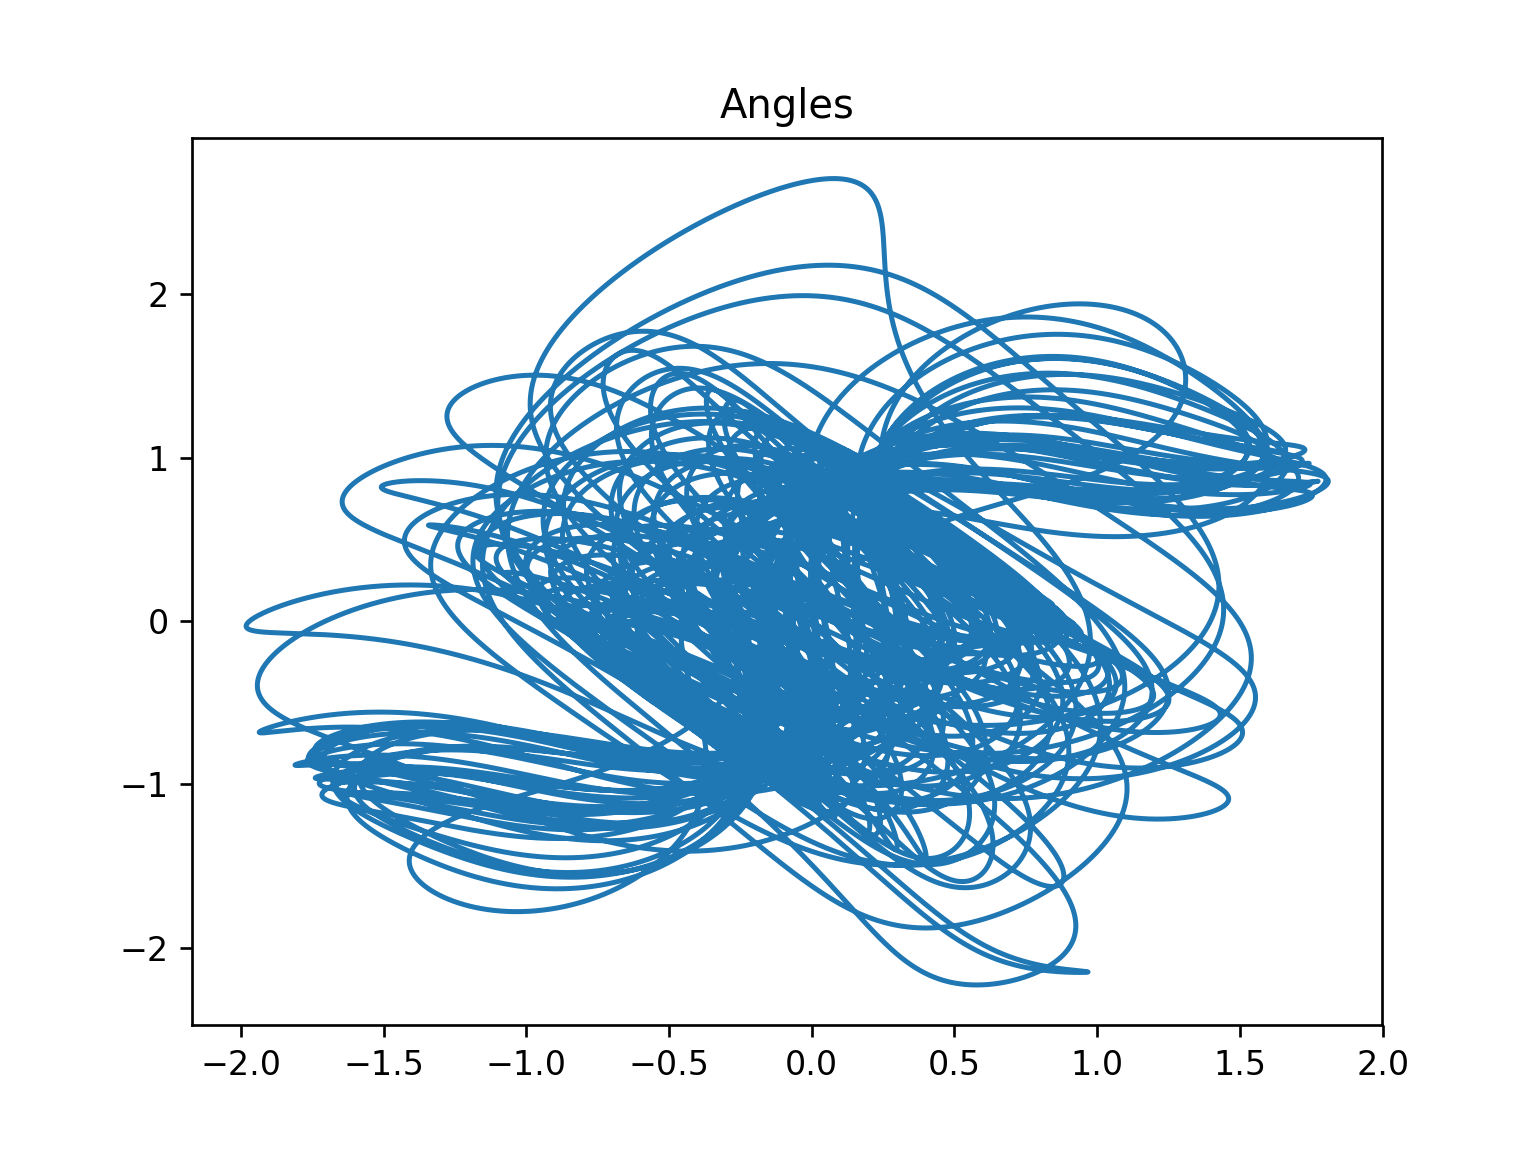

<IPython.core.display.Javascript object>


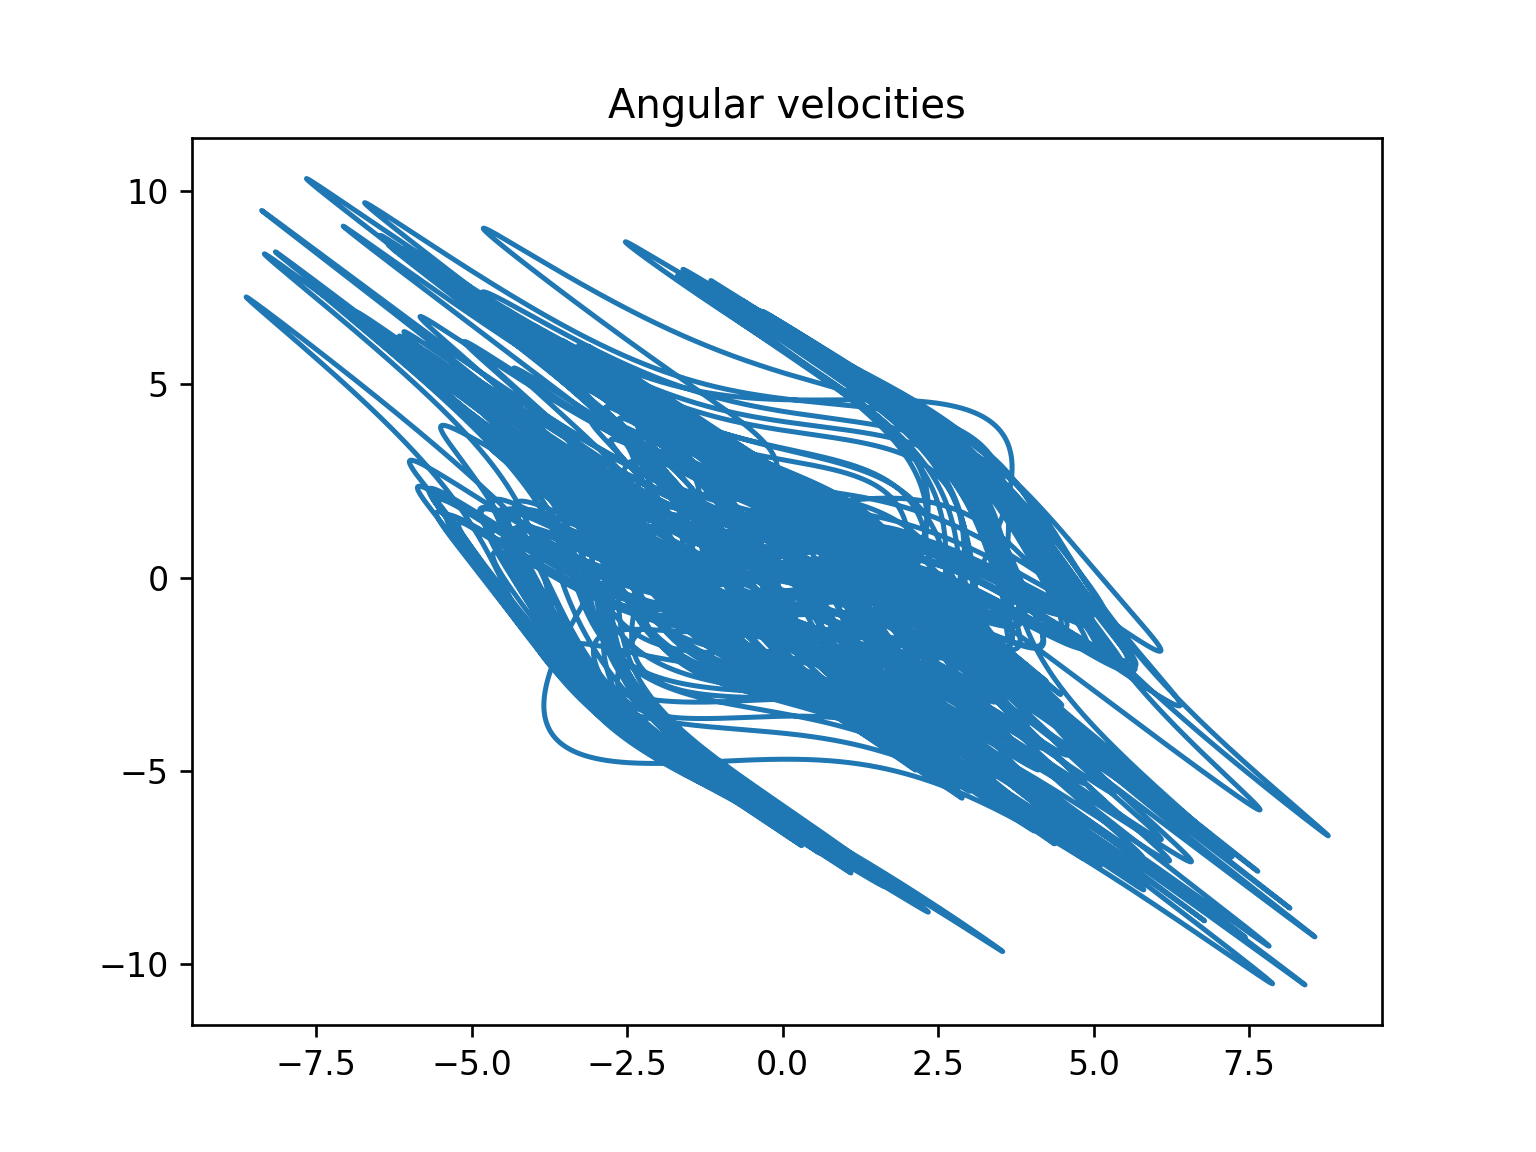

<IPython.core.display.Javascript object>


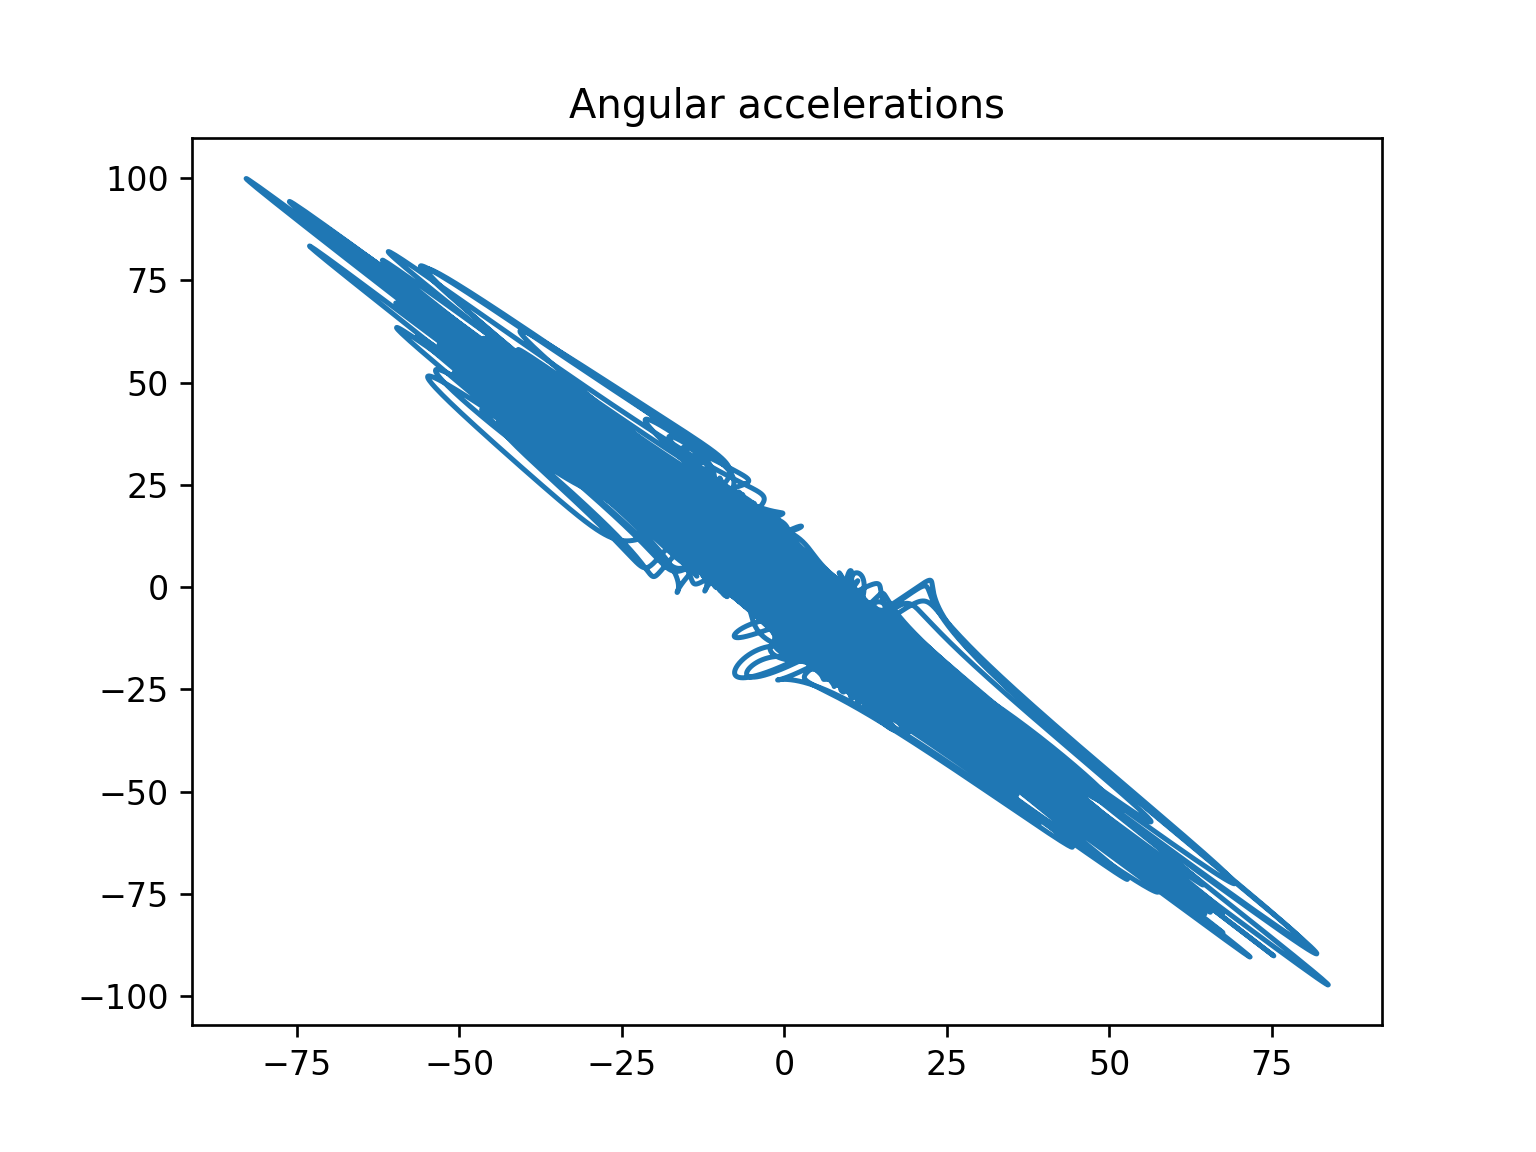

In [95]:
# Parameters
g = 9.8
l1 = 1.0
l2 = 1.0
m1 = 1.0
m2 = 2.0
w1_2 = g / l1
w2_2 = g / l2
T1 = 2 * np.pi / np.sqrt(w1_2)
T2 = 2 * np.pi / np.sqrt(w2_2)
alpha = m2 / (m1 + m2)
beta = l1 / l2
alpha_d_beta = alpha / beta

# Initial conditions
theta = np.random.uniform(-0.9*np.pi, +0.9*np.pi, 2)
thetaDot = np.zeros(2)

# Properties of the simulation
timeTot = 100 * max(T1, T2)
nStep = 200000
dt = timeTot / nStep

theta1Lst = np.zeros(nStep)
theta2Lst = np.zeros(nStep)
thetaDot1Lst = np.zeros(nStep)
thetaDot2Lst = np.zeros(nStep)
thetaDDot1Lst = np.zeros(nStep)
thetaDDot2Lst = np.zeros(nStep)

# Simulation
for i in range(nStep):
    deltaTheta = theta[1] - theta[0]
    sin_theta = np.sin(theta)
    sin_delta = np.sin(deltaTheta)
    cos_delta = np.cos(deltaTheta)
    
    rhs = np.array([
        alpha * sin_delta * thetaDot[1]**2 - w1_2 * sin_theta[0],
        -beta * sin_delta * thetaDot[0]**2 - w2_2 * sin_theta[1]])
    M = np.array([[1.0, alpha_d_beta * cos_delta], [beta * cos_delta, 1.0]])
    thetaDDot = np.linalg.solve(M, rhs)
    
    thetaDot += thetaDDot * dt
    theta    += thetaDot  * dt
    
    theta1Lst[i] = theta[0]
    theta2Lst[i] = theta[1]
    thetaDot1Lst[i] = thetaDot[0]
    thetaDot2Lst[i] = thetaDot[1]
    thetaDDot1Lst[i] = thetaDDot[0]
    thetaDDot2Lst[i] = thetaDDot[1]
    
fig = plt.figure()
plt.plot(theta1Lst, theta2Lst)
plt.title("Angles")
plt.show()

fig = plt.figure()
plt.plot(thetaDot1Lst, thetaDot2Lst)
plt.title("Angular velocities")
plt.show()

fig = plt.figure()
plt.plot(thetaDDot1Lst, thetaDDot2Lst)
plt.title("Angular accelerations")
plt.show()

In [96]:
print("2D case")
print("--------------------------------------")
data2D = np.array(list(zip(theta1Lst, theta2Lst)))
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data2D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("4D case")
print("--------------------------------------")
data4D = np.array(list(zip(theta1Lst[:-1], theta2Lst[:-1], theta1Lst[1:], theta2Lst[1:])))
pca = PCA(n_components=4, svd_solver='full')
pca.fit(data4D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("6D case")
print("--------------------------------------")
data6D = np.array(list(zip(theta1Lst[:-2], theta2Lst[:-2], theta1Lst[1:-1], theta2Lst[1:-1], theta1Lst[2:], theta2Lst[2:])))
pca = PCA(n_components=6, svd_solver='full')
pca.fit(data6D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("8D case")
print("--------------------------------------")
data8D = np.array(list(zip(theta1Lst[:-3], theta2Lst[:-3], theta1Lst[1:-2], theta2Lst[1:-2], theta1Lst[2:-1], theta2Lst[2:-1], theta1Lst[3:], theta2Lst[3:])))
pca = PCA(n_components=8, svd_solver='full')
pca.fit(data8D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

2D case
--------------------------------------
Components: 
 [[ 0.4980231   0.86716376]
 [ 0.86716376 -0.4980231 ]]
SVal:        [ 400.70636268  332.42963853]
Var:         [ 0.5923289  0.4076711]


4D case
--------------------------------------
Components: 
 [[ 0.3521366   0.61319115  0.35215662  0.61317383]
 [ 0.61319518 -0.35212706  0.6131698  -0.35216616]
 [-0.42406745  0.56583567  0.42404063 -0.5658501 ]
 [ 0.56582531  0.42406738 -0.56586045 -0.4240407 ]]
SVal:        [ 566.68104205  470.12451902    1.03470848    0.61509973]
Var:         [  5.92326520e-01   4.07670808e-01   1.97478502e-06   6.97870557e-07]


6D case
--------------------------------------
Components: 
 [[  2.87503679e-01   5.00678601e-01   2.87520125e-01   5.00666413e-01
    2.87536389e-01   5.00650297e-01]
 [  5.00684586e-01  -2.87486919e-01   5.00667575e-01  -2.87522494e-01
    5.00643147e-01  -2.87550780e-01]
 [ -4.24072613e-01   5.65831298e-01  -1.53981006e-05  -4.86716270e-06
    4.24034351e-01  -5.65855308e-01

In [102]:
# Try to see how PCA will react if we convert timed history to derivatives. Use Finite Difference Calculator
# http://web.media.mit.edu/~crtaylor/calculator.html

x1 = (theta1Lst[:-3] + theta1Lst[1:-2] + theta1Lst[2:-1] + theta1Lst[3:]) / 4
x2 = (theta2Lst[:-3] + theta2Lst[1:-2] + theta2Lst[2:-1] + theta2Lst[3:]) / 4
v1 = (theta1Lst[:-3] - 6*theta1Lst[1:-2] + 3*theta1Lst[2:-1] + 2*theta1Lst[3:]) / (6 * dt)
v2 = (theta2Lst[:-3] - 6*theta2Lst[1:-2] + 3*theta2Lst[2:-1] + 2*theta2Lst[3:]) / (6 * dt)
a1 = (0*theta1Lst[:-3] + theta1Lst[1:-2] - 2*theta1Lst[2:-1] + theta1Lst[3:]) / (dt**2)
a2 = (0*theta2Lst[:-3] + theta2Lst[1:-2] - 2*theta2Lst[2:-1] + theta2Lst[3:]) / (dt**2)
g1 = (-1*theta1Lst[:-3] + 3*theta1Lst[1:-2] - 3*theta1Lst[2:-1] + theta1Lst[3:]) / (dt**3)
g2 = (-1*theta2Lst[:-3] + 3*theta2Lst[1:-2] - 3*theta2Lst[2:-1] + theta2Lst[3:]) / (dt**3)

# stDev = np.std([x1,x2,v1,v2,a1,a2,g1,g2], axis=1)
# x1 /= stDev[0]
# x2 /= stDev[1]
# v1 /= stDev[2]
# v2 /= stDev[3]
# a1 /= stDev[4]
# a2 /= stDev[5]
# g1 /= stDev[6]
# g2 /= stDev[7]

print("Stdev", stDev)


print("2D case")
print("--------------------------------------")
data2D = np.array(list(zip(x1, x2)))
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data2D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("4D case")
print("--------------------------------------")
data4D = np.array(list(zip(x1, x2, v1, v2)))
pca = PCA(n_components=4, svd_solver='full')
pca.fit(data4D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("6D case")
print("--------------------------------------")
data6D = np.array(list(zip(x1, x2, v1, v2, a1, a2)))
pca = PCA(n_components=6, svd_solver='full')
pca.fit(data6D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

print("8D case")
print("--------------------------------------")
data8D = np.array(list(zip(x1, x2, v1, v2, a1, a2, g1, g2)))
pca = PCA(n_components=8, svd_solver='full')
pca.fit(data8D)
print("Components: \n", pca.components_)
print("SVal:       ", pca.singular_values_)
print("Var:        ", pca.explained_variance_ratio_)
print("\n")

Stdev [   0.78396606    0.86066443    2.49607704    2.85671764   15.29826319
   18.2217896   350.4358801   420.25820983]
2D case
--------------------------------------
Components: 
 [[ 0.49798965  0.86718297]
 [ 0.86718297 -0.49798965]]
SVal:        [ 400.69869238  332.4239783 ]
Var:         [ 0.59232788  0.40767212]


4D case
--------------------------------------
Components: 
 [[ 0.00224589  0.00239282  0.59963575 -0.80026633]
 [ 0.0086324  -0.00676875 -0.8002244  -0.59960035]
 [ 0.49809158  0.86711713 -0.00317112  0.00161446]
 [ 0.86707855 -0.49805255  0.0082353   0.00711487]]
SVal:        [ 1458.2303201    867.10245737   400.67185456   332.30850773]
Var:         [ 0.67521559  0.23874322  0.05097625  0.03506494]


6D case
--------------------------------------
Components: 
 [[  1.20607174e-02  -1.55171449e-02  -5.85351494e-04  -3.96226502e-04
   -6.36193008e-01   7.71279271e-01]
 [  1.06134185e-01   1.04174599e-01   1.54275121e-02  -1.93424945e-02
   -7.62826135e-01  -6.28782423e-01

Conclusions:
* PCA is able to to determine linearly-dependent components (lice acceleration in harmonic oscillator), and show that they explain no additional variance on top of what is already explained by position and momentum
* PCA is unable to determine the existence of nonlinear dependence between (position, momentum) and higher derivatives (acceleration, torque) for example, in double pendulum.
* **Very Important**: Explained Variance in PCA is highly dependent on prefactors of original data. For example
    * When providing 1 step history for double pendulum, there are 4 principal components, and the first two explain 5 orders of magnitude more variance than the other two, suggesting that most of the dynamics is contained in an effective 2D phase space. However, when one performs a linear transformation, explicitly calculating positions and velocities, the drop is only one order of magnitude.
    * When providing progressively longer history for double pendulum and explicitly calculating numerical derivatives from position, the drop in explained variance for each two principal components is 2 orders of magnitude. However, if one normalizes each derivative by its variance, the drop is only one order of magnitude. This is in perfect accordance with the fact that each next derivative has one order of magnitude higher amplitude in this process.
    
Take home messages:
* **PCA fails to accurately determine dimensionality of nonlinear processes**. Blowing things up into higher dimension helps, but maybe there exist nonlinear component analysis strategies that would work better?
* **Avoid implicit scaling constants entering the explained variance**: When investigating Markov history of certain length, it is not ok to do PCA on the history itself. One must transform the history into dynamic variables. If it is not clear what the dynamic variables and the characteristic lengthscales of the associated processes are, one risks ignoring a scaled-down process as insignificant
* **Avoid explicit scaling constants entering the explained variance**: It is important to work with dimensionless quantities for PCA. All physical quantities such as time or length have to be normalized by the characteristic lengthscale to ensure they are comparable with other quantities
    
